## Poisson Equation - 1D - Finite Difference Method

Equation:
$$\frac{\partial^2 T}{\partial^2 x} = - f(x), \quad x \in (0, 1)$$
$$ T(0) = 0, \quad T(1) = 1 $$
$$ f(x) = \begin{cases}
      20, & 0.2 < x < 0.5 \\
      0, & \text{otherwise}
    \end{cases}\, $$
Discretized Equation (Finite Difference Method)
$$ u_{i-1} - 2u_i + u_{i+1} = -\Delta x^2 f(x_i) $$

In [1]:
import jax.numpy as jnp

# Number of grid points
N = 101
X = jnp.linspace(0.0, 1.0, N)
T = jnp.zeros(N)
deltaX = X[1] - X[0]

# Boundary Condition
T0 = 0
Tn = 1.0
T = T.at[0].set(T0)
T = T.at[-1].set(Tn)

In [2]:
# Source function
SourceFunction = lambda x: jnp.where((x > 0.2) & (x < 0.5), 20.0, 0.0)
Fx = SourceFunction(X[1:-1])

In [3]:
# Construct A and B Matrix
A = jnp.diag(jnp.ones(N-3), -1) - jnp.diag(2*jnp.ones(N-2), 0) + jnp.diag(jnp.ones(N-3), 1)

# B Vector
B = -(deltaX**2)*Fx

# Boundary Condition Contribution
BC = jnp.zeros(N-2)
BC = BC.at[0].set(-T0)
BC = BC.at[-1].set(-Tn)
B += BC

In [4]:
# Solve AX=B
T = T.at[1:-1].set(jnp.linalg.solve(A, B))

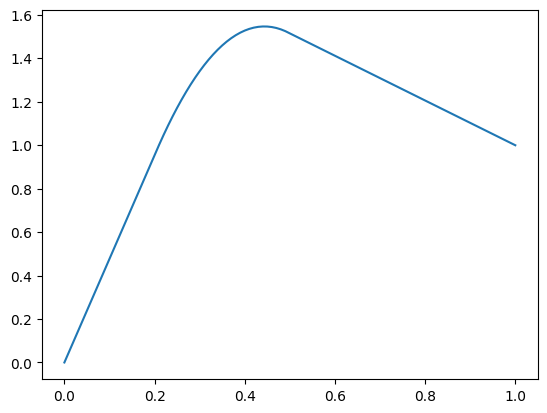

In [5]:
# Plot the solution
import matplotlib.pyplot as plt
plt.plot(X, T)
plt.show()

In [6]:
# Write to file
import pandas as pd
df = pd.DataFrame({'x':X, 'T':T})
# df.to_csv('FDM.csv', index=False)    <---- To write as csv
df.to_feather('FDM.feather')